In [118]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)
import os
import sys
sys.path.append(os.path.abspath('../common')) # add path to common functions

In [119]:
from evaluate import get_classification_report, evaluate_predictions

In [120]:
emote_df = pd.read_csv("../datasets/train/train_emoticon.csv")

In [121]:
from preprocess import getdfs
train_df, test_df = getdfs()
y_train = train_df["label"]
y_test = test_df["label"]

Preprocessing the data into numeric form

In [122]:
# 1. split the string into individual characters
# 2. run a correlation matrix on each category
# check number of distinct emotes

# Split the string into individual characters
emote_df["characters"] = emote_df["input_emoticon"].apply(list)

# Create new columns for each character
for i in range(len(emote_df["characters"][0])):
    emote_df[f"c_{i+1}"] = emote_df["characters"].apply(
        lambda x: x[i] if len(x) > i else ""
    )
l1 = [f"c_{i+1}" for i in range(len(emote_df["characters"][0]))]
edf = emote_df[l1].apply(lambda x: [ord(i) for i in x])
edf.insert(13, "label", emote_df["label"])

Function block

Failed Approach : Creating a Bag-of-words of only the most significant emojis.

In [123]:
# print the n most common emotes in each category
# for col in l1:
#     print(f"Most common emotes in {col}:")
#     print(edf[col].value_counts().head(n))

# 1. bag of words method


# Take the 7 most common emotes
# print(edf[l1].apply(pd.Series.value_counts).sum(axis=1).nlargest(100).head(10))
# Create a bag of words model

# common_emotes = edf[l1].apply(pd.Series.value_counts).sum(axis=1).nlargest(7).index.tolist()
# vectorizer = CountVectorizer(vocabulary=[str(emote) for emote in common_emotes])
# emote_strings = edf[l1].apply(lambda row: ' '.join(row.astype(str)), axis=1)
# bag_of_words = vectorizer.fit_transform(emote_strings)
# Convert to DataFrame for better readability
# bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
# bow_df['label'] = edf['label']
# bow_df

# every entry has a same common set of 7 emojis shuffled around

We Create a comprehensive non-dimensionally reduced Bag of words model: this also didnt work

In [124]:
# make a list of all the unique emotes in edf
unique_emotes = pd.unique(train_df[l1].values.ravel())

vectorizer = CountVectorizer(vocabulary=[emote for emote in unique_emotes])
emote_strings = edf[l1].apply(lambda row: " ".join(row.astype(str)), axis=1)
bag_of_words = vectorizer.fit_transform(emote_strings)
# Convert to DataFrame for better readability
bow_sparse_df = pd.DataFrame(
    bag_of_words.toarray(), columns=vectorizer.get_feature_names_out()
)
bow_sparse_df["label"] = edf["label"]
bow_sparse_df.shape

bow = bow_sparse_df.to_numpy()

X_bow = bow[:, :-1]
y_bow = bow[:, -1]


## LOGISTIC REGRESSION 
on non-dimensionally reduced bag of words model

In [125]:
# Define features and target
# Perform train-test split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    X_bow, y_bow, test_size=0.2, random_state=42
)


log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_bow, y_train_bow)

y_train_pred = log_reg.predict(X_train_bow)
y_test_pred = log_reg.predict(X_test_bow)

# evaluate_predictions(y_train_bow, y_train_pred, "Title")

TF-IDF MAPPING: also didnt work

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(vocabulary=[str(emote) for emote in unique_emotes])

# Fit and transform the emote strings
tfidf_matrix = tfidf_vectorizer.fit_transform(emote_strings)

# Convert to DataFrame for better readability
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)
tfidf_df["label"] = edf["label"]

# Display the TF-IDF DataFrame
tfidf = tfidf_df.to_numpy()
X_tf = tfidf[:, :-1]
y_tf = tfidf[:, -1]

In [127]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(
    X_tf, y_tf, test_size=0.2, random_state=42
)

log_reg.fit(X_train_tf, y_train_tf)

y_train_pred_tf = log_reg.predict(X_train_tf)
y_test_pred_tf = log_reg.predict(X_test_tf)
# evaluate_predictions(y_train, y_train_pred, 'title')


## SUPPORT VECTOR MACHINE

on Bag of words

In [128]:
from sklearn.svm import SVC

# Perform train-test split

# Create and train the SVM model
svm_model = SVC(kernel="linear", C=1.0, random_state=42)
svm_model.fit(X_train_bow, y_train_bow)

# Make predictions
y_train_pred_svm_bow = svm_model.predict(X_train_bow)
y_test_pred_svm_bow = svm_model.predict(X_test_bow)

# Evaluate the model
train_report_svm = get_classification_report(y_train_bow, y_train_pred_svm_bow)
test_report_svm = get_classification_report(y_test_bow, y_test_pred_svm_bow)

/opt/miniconda3/envs/cs771/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/cs771/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/cs771/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/

PCA didnt work

In [129]:
# # Perform PCA
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(edf[l1])

# # Create a DataFrame with the principal components
# pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1'])
# pca_df['label'] = edf['label']

# # Display the PCA DataFrame
# pca_df.to_numpy()
# X_pca = pca_df.to_numpy()[:, :-1]
# y_pca = pca_df.to_numpy()[:, -1]

# X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)
# log_reg.fit(X_train_pca, y_train_pca)

# y_train_pred_pca = log_reg.predict(X_train_pca)
# y_test_pred_pca = log_reg.predict(X_test_pca)

# train_report_pca = get_classification_report(y_train_pca, y_train_pred_pca)
# test_report_pca = get_classification_report(y_test_pca, y_test_pred_pca)

# print("Train Classification Report for PCA:\n", train_report_pca)
# print("Test Classification Report for PCA:\n", test_report_pca)

# plot_confusion_matrix(y_train_pca, y_train_pred_pca, ['Class 0', 'Class 1'], title='Train Confusion Matrix')

In [130]:
emo_spaced = [" ".join(x) for x in emote_df["characters"]]
sentences = emo_spaced


# Simple Tokenizer (word-to-index mapping)
class SimpleTokenizer:
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.vocab_size = 0

    def fit(self, sentences):
        idx = 1  # Start index from 1 (0 is reserved for padding)
        for sentence in sentences:
            for word in sentence.split():
                if word not in self.word2idx:
                    self.word2idx[word] = idx
                    self.idx2word[idx] = word
                    idx += 1
        self.vocab_size = idx

    def texts_to_sequences(self, sentences):
        sequences = []
        for sentence in sentences:
            sequences.append([self.word2idx[word] for word in sentence.split()])
        return sequences


# Initialize tokenizer and fit on sentences
tokenizer = SimpleTokenizer()
tokenizer.fit(sentences)

# Convert sentences to sequences of indices
sequences = tokenizer.texts_to_sequences(sentences)
X_tr, X_te, y_tr, y_te = train_test_split(
    sequences, y_bow, test_size=0.2, random_state=42
)

In [131]:
log_reg.fit(X_tr, y_tr)

# Make predictions
y_pr_tr = log_reg.predict(X_tr)
y_pr_te = log_reg.predict(X_te)

# Evaluate the model
train_report_svm = get_classification_report(y_tr, y_pr_tr)
test_report_svm = get_classification_report(y_te, y_pr_te)

In [132]:
# Create one-hot encoding of the dataset
from preprocess import one_hot_encode

oh_X_train, oh_X_val, y_train, y_val = one_hot_encode(train_df, test_df)

   label  c_1_😁  c_1_😂  c_1_😃  c_1_😄  c_1_😅  c_1_😆  c_1_😇  c_1_😉  c_1_😊  ...  \
0      0  False  False  False  False  False  False  False  False  False  ...   
1      0  False  False  False  False  False  False  False  False  False  ...   
2      0  False  False  False  False  False  False  False  False  False  ...   
3      1  False  False  False  False  False  False  False  False  False  ...   
4      1  False  False  False  False  False  False  False  False  False  ...   

   c_13_🛍  c_13_🛏  c_13_🛑  c_13_🛓  c_13_🛖  c_13_🛘  c_13_🛙  c_13_🛛  c_13_🛟  \
0   False   False   False   False   False   False   False   False   False   
1   False   False   False   False   False   False   False   False   False   
2   False   False   False   False   False   False   False   False   False   
3   False   False   False   False   False   False   False   False   False   
4   False   False   False   False   False   False   False   False   False   

   c_13_🛡  
0   False  
1   False  
2   False  
3   Fals

In [133]:
from models import predict_logistic_regression
oh_y_pred = predict_logistic_regression(oh_X_train, y_train, oh_X_val)

evaluate_predictions(y_val, oh_y_pred, "Logistic Regression on One hot")

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- c_10_😅
- c_10_😉
- c_10_😊
- c_10_😔
- c_10_😢
- ...


Train Classification Report for SVM on :
               precision    recall  f1-score   support

     Class 0       0.97      0.97      0.97      2857
     Class 1       0.97      0.97      0.97      2807

    accuracy                           0.97      5664
   macro avg       0.97      0.97      0.97      5664
weighted avg       0.97      0.97      0.97      5664

Test Classification Report for SVM:
               precision    recall  f1-score   support

     Class 0       0.84      0.85      0.84       719
     Class 1       0.84      0.84      0.84       697

    accuracy                           0.84      1416
   macro avg       0.84      0.84      0.84      1416
weighted avg       0.84      0.84      0.84      1416



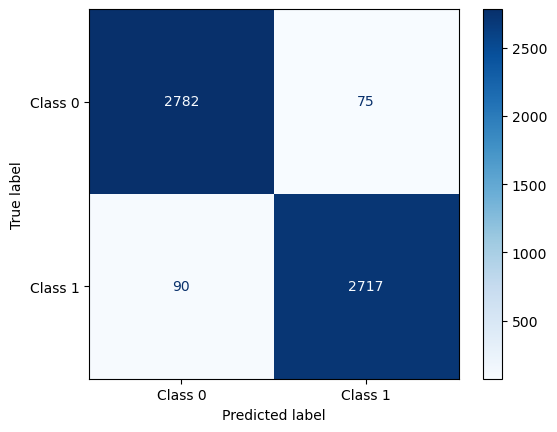

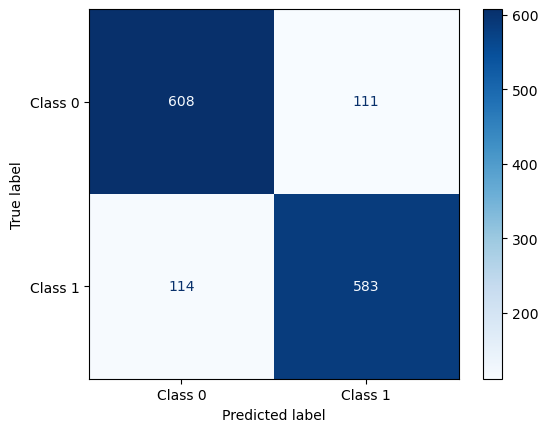

In [84]:
from models import predict_svc
oh_y_pred = predict_logistic_regression(oh_X_train, y_train, oh_X_val)

evaluate_predictions(y_val, oh_y_pred, "Support Vector Classifier on One hot")

NOW WE USE XGBOOST